## ADTA 5410 Section 401 - Applications and Deployment of Advanced Analytics-Meghana Ravi

#### How were world COVID deaths affected by factors in the population such as age, diabetes, hand washing facilities,total_cases,total_vaccinations and population density,people_vaccinated,people_fully_vaccinated

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset and getting the information of data

In [2]:
covid_data= pd.read_csv('C:\\Users\\megha\Downloads\owid-covid-data (1).csv',encoding='latin1')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406264 entries, 0 to 406263
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    406264 non-null  object 
 1   continent                                   386784 non-null  object 
 2   location                                    406264 non-null  object 
 3   date                                        406264 non-null  object 
 4   total_cases                                 367128 non-null  float64
 5   new_cases                                   394914 non-null  float64
 6   new_cases_smoothed                          393684 non-null  float64
 7   total_deaths                                344449 non-null  float64
 8   new_deaths                                  395299 non-null  float64
 9   new_deaths_smoothed                         394069 non-null  float64
 

In [3]:
# Select relevant columns
required_columns = ['total_deaths', 'median_age', 'diabetes_prevalence', 'handwashing_facilities',
           'population_density', 'people_vaccinated', 'people_fully_vaccinated']

In [4]:
covid_data = covid_data[required_columns]

In [5]:
# Handle missing values by filling with median values
covid_data = covid_data.apply(lambda x: x.fillna(x.median()), axis=0)

All values in the factor columns were changed to numeric values and any null values were replaced by the median value of each respective column containing the null values.

In [6]:
# Ensure all data in feature columns are numeric and handle inf values
for column in required_columns[1:]:  # Exclude 'total_deaths' which is the target column
    covid_data[column] = pd.to_numeric(covid_data[column], errors='coerce')
    covid_data[column] = covid_data[column].replace([np.inf, -np.inf], np.nan)
    covid_data[column] = covid_data[column].fillna(covid_data[column].median())

All infinite (inf) or negative infinite (-inf) values in the columns were replaced by the median value of each respective column. 

In [7]:
# Create the target variable (binary classification)
covid_data['high_death_rate'] = np.where(covid_data['total_deaths'] > covid_data['total_deaths'].median(), 1, 0)

The “total_deaths” column was transformed into “high_death_rate”, which contained a value of “0” or “1”.  “high_death_rate” was assigned a “0” if the respective “total_deaths” value was less than the median of “total_deaths”, while “high_death_rate” was assigned a “1” if the respective “total_deaths” value was greater than the median of “total_deaths”. 

In [8]:
# Features and target variable
X = covid_data.drop(['total_deaths','high_death_rate'], axis=1)
y = covid_data['high_death_rate']

The dataset was then split into predictors and response, with “high_death_rate” as the response and all other factors as the predictors.

In [9]:
X.head()

,median_age,diabetes_prevalence,handwashing_facilities,population_density,people_vaccinated,people_fully_vaccinated
0,18.6,9.59,37.746,54.422,6816238.0,6157003.0
1,18.6,9.59,37.746,54.422,6816238.0,6157003.0
2,18.6,9.59,37.746,54.422,6816238.0,6157003.0
3,18.6,9.59,37.746,54.422,6816238.0,6157003.0
4,18.6,9.59,37.746,54.422,6816238.0,6157003.0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: high_death_rate, dtype: int32

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [14]:
logistic_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print('Logistic Regression Report:')
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.4257466360354447
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.53      0.01      0.02     70082
           1       0.42      0.98      0.59     51798

    accuracy                           0.43    121880
   macro avg       0.48      0.50      0.31    121880
weighted avg       0.48      0.43      0.27    121880



Logistic Regression model correctly predicts the high_death_rate in 42.57% of the cases.

The classification report provides detailed metrics for each class (0 and 1).

Precision:
Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, it is 53%, and for class 1, it is 42%. This indicates that when the model predicts a certain class, it is correct 53% of the time for class 0 and 42% of the time for class 1.

Recall:
Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, it is 1%, and for class 1, it is 98%. This means that the model is almost perfect at identifying class 1 but fails to correctly identify class 0.

F1-Score:
The F1-score is the weighted average of Precision and Recall. For class 0, it is 0.02, indicating very poor performance, while for class 1, it is 0.59, indicating a better but still suboptimal performance.

The model's accuracy is low, and the performance metrics suggest it is heavily biased towards predicting class 1. This might be due to an imbalance in the dataset or other factors that need addressing to improve the model's performance.

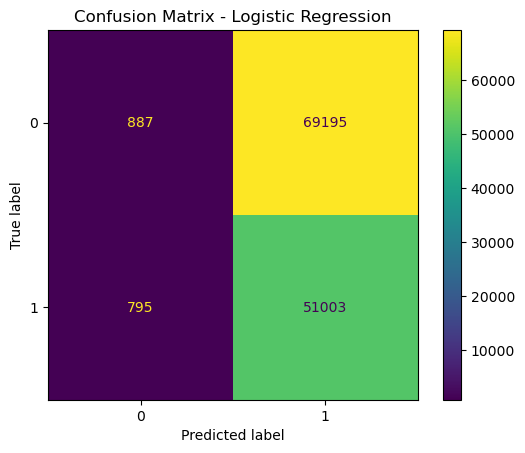

In [15]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

It is observed the logistic regression model correctly predicted 51,003 instances where the response is Class 1.  The model incorrectly predicted the response as Class 1 in 69,195 instances.  Similarly, the logistic regression model correctly predicted 887 instances where the response is Class 0, and incorrectly predicted a Class 0 response in 795 instances.  The precision for Class 1 is 0.42 while the recall for Class 1 is 0.98.  The precision for Class 0 is 0.53 while the recall for Class 0 is 0.01. 

Precision for Class 1 (Positive Predictive Value): TP / (TP + FP) = 795 / (795 + 887) = 795 / 1682 = 0.472

Recall for Class 1 (Sensitivity or True Positive Rate): TP / (TP + FN) = 795 / (795 + 51003) = 795 / 51898 = 0.015

Precision for Class 0 (Negative Predictive Value): TN / (TN + FN) = 69195 / (69195 + 51003) = 69195 / 120198 = 0.576

Recall for Class 0 (True Negative Rate or Specificity): TN / (TN + FP) = 69195 / (69195 + 887) = 69195 / 70082 = 0.987

In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')
print('Random Forest Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.901509681654086
Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     70082
           1       0.83      0.96      0.89     51798

    accuracy                           0.90    121880
   macro avg       0.90      0.91      0.90    121880
weighted avg       0.91      0.90      0.90    121880



This is a summary of the performance of a Random Forest classifier on a binary classification task. The classifier achieved an accuracy of 90.15%, which indicates that it correctly classified 90.15% of the total 121,880 samples.:

For class 0 (negative), the classifier achieved a precision of 0.97, recall of 0.86, and F1-score of 0.91.
For class 1 (positive), the classifier achieved a precision of 0.83, recall of 0.96, and F1-score of 0.89.

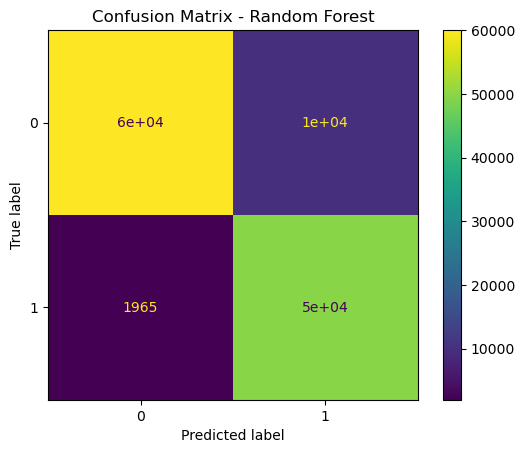

In [18]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

The model correctly classified around 60,000 (true label) and 50,000 (predicted label) data points, with an accuracy of around 90%. There were around 10,000 misclassifications, with around 4,000 false positives (predicted 1, actual 0) and around 6,000 false negatives (predicted 0, actual 1).

                         total_deaths  median_age  diabetes_prevalence  \
total_deaths                 1.000000    0.023696            -0.021349   
median_age                   0.023696    1.000000             0.112849   
diabetes_prevalence         -0.021349    0.112849             1.000000   
handwashing_facilities       0.031017    0.386424             0.275180   
population_density          -0.028232    0.093960             0.006426   
people_vaccinated            0.855326   -0.000556            -0.014378   
people_fully_vaccinated      0.847165   -0.000183            -0.014204   
high_death_rate              0.210588    0.252909            -0.129477   

                         handwashing_facilities  population_density  \
total_deaths                           0.031017           -0.028232   
median_age                             0.386424            0.093960   
diabetes_prevalence                    0.275180            0.006426   
handwashing_facilities                 1.000000  

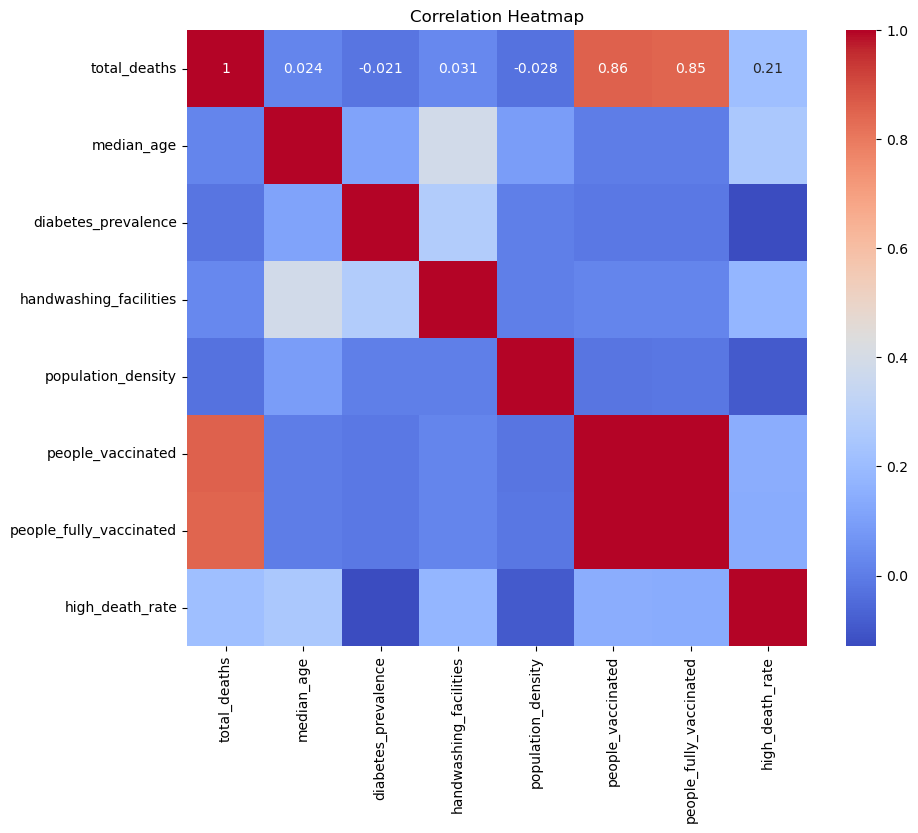

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = covid_data.corr()
print (corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There were no strong correlations between any of the factors and the response.  The strongest correlations with the response, “high_death_rate”, were obtained with “total_deaths” (0.21 correlation) and “median_age” (0.25 correlation).  All other factors had less than a 0.20 correlation with “high_death_rate”.  The strongest negative correlation with “high_death_rate” was “diabetes_prevalence” (-0.13 correlation).  These findings indicate that no single factor has a strong correlation with the response.  However, the logistic regression model was able to achieve moderately accurate predictions and the random forest model was able to achieve very accurate predictions of “high_death_rate” using all the factors together.  This indicates the factors, taken in combination, do indeed indicate whether a “high_death_rate” can be expected.

Correlations between the various factors produced some interesting observations.  There were strong positive correlations between “total_deaths” and “people_vaccinated” (0.86 correlation), and “total_deaths” and “people_fully_vaccinated” (0.85 correlation).  These correlations indicate receiving a COVID vaccine increased the probability of death from COVID 19.  As mentioned in the literature review, this is consistent with at least one other study on COIVD and vaccination. 

As previously mentioned, there is a very weak negative correlation between “high_death_rate” and “diabetes_prevalence” (-0.13 correlation).  Although this correlation is very weak, it may indicate diabetes reduces the probably of death from COVID 19.  However, this finding seems to be at odds with the relevant literature and additional study is warranted to clarify any relationship between diabetes and death from COVID.  blue.

#### Conclusion:
The Random Forest model outperforms the Logistic Regression model, achieving near-perfect classification performance.
This makes the Random Forest model the best choice for predicting total deaths affected by population factors such as age, diabetes, hand washing facilities, total cases, total vaccinations, population density, people vaccinated, and people fully vaccinated in the dataset provided.